# Sensor Class usage

This code aims to briefly exemplify the usage of the Sensor classes.


In [29]:
import matplotlib.pyplot as plt
import numpy as np

from rocketpy import Environment, SolidMotor, Rocket, Flight

In [30]:
%matplotlib inline

## Create an Environment


Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at  10.000 km (ASL): 9.7649 m/s²


Launch Site Details

Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1400.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 10.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 5.83 m/s
Surface Wind Direction: 219.81°
Surface Wind Heading: 39.81°
Surface Pressure: 855.97 hPa
Surface Temperature: 279.07 K
Surface Air Density: 1.069 kg/m³
Surface Speed of Sound: 334.55 m/s


Earth Model Details

Earth Radius at Launch site: 6371.83 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



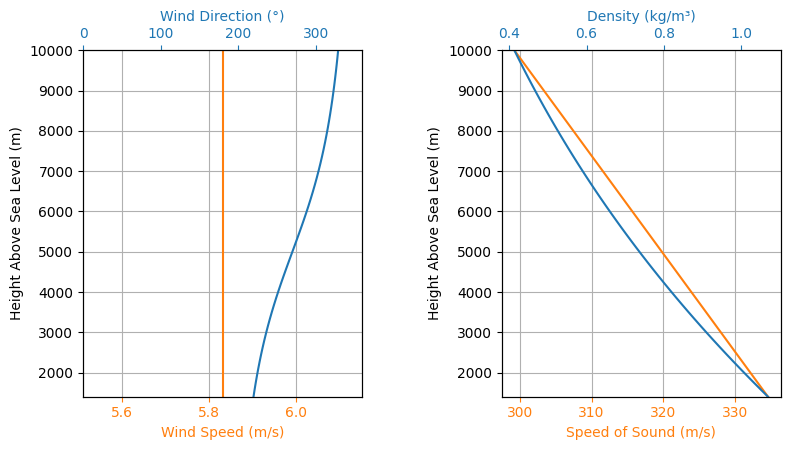

In [31]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)
env.set_atmospheric_model(
    type="custom_atmosphere", wind_u=[(0, 3), (10000, 3)], wind_v=[(0, 5), (10000, -5)]
)
env.info()

## Create a Motor

In [32]:
Pro75M1670 = SolidMotor(
    thrust_source="../../data/motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

## Create a Rocket

In [33]:
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)

calisto.add_motor(Pro75M1670, position=-1.255)

nose_cone = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../../data/calisto/NACA0012-radians.csv", "radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

## Adds Sensors to the Rocket

In [34]:
from rocketpy import Accelerometer, Gyroscope, Barometer, GnssReceiver

accel_noisy_nosecone = Accelerometer(
    sampling_rate=100,
    consider_gravity=False,
    orientation=(60, 60, 60),
    measurement_range=70,
    resolution=0.4882,
    noise_density=0.05,
    random_walk_density=0.02,
    constant_bias=1,
    operating_temperature=25,
    temperature_bias=0.02,
    temperature_scale_factor=0.02,
    cross_axis_sensitivity=0.02,
    name='Accelerometer in Nosecone',
)
accel_clean_cdm = Accelerometer(
    sampling_rate=100,
    consider_gravity=False,
    orientation=[
        [0.25, -0.0581, 0.9665],
        [0.433, 0.8995, -0.0581],
        [-0.8661, 0.433, 0.25],
    ],
    name='Accelerometer in CDM',
)
calisto.add_sensor(accel_noisy_nosecone, 1.278)
calisto.add_sensor(accel_clean_cdm, -0.10482544178314143)  # , 127/2000)

In [43]:
accel_noisy_nosecone.prints.all()
accel_clean_cdm.prints.all()  # should have the same rotation matrix

Identification:

Name:                      Accelerometer in Nosecone
Type:                      Accelerometer

Orientation of the Sensor:

Orientation:               (60, 60, 60)
Normal Vector:             (0.7500000000000712, -0.43301270189204105, 0.5000000000000475)
Rotation Matrix:
                           [-0.12, -0.65, 0.75]
                           [0.65, -0.62, -0.43]
                           [0.75, 0.43, 0.5]

Quantization:

Measurement Range:         -70 to 70 (m/s^2)
Resolution:                0.4882 m/s^2/LSB

Noise:

Noise Density:             (0.05, 0.05, 0.05) m/s^2/√Hz
Noise Variance:            (1, 1, 1) (m/s^2)^2
Random Walk Density:       (0.02, 0.02, 0.02) m/s^2/√Hz
Random Walk Variance:      (1, 1, 1) (m/s^2)^2
Constant Bias:             (1, 1, 1) m/s^2
Operating Temperature:     25 K
Temperature Bias:          (0.02, 0.02, 0.02) m/s^2/K
Temperature Scale Factor:  (0.02, 0.02, 0.02) %/K
Cross Axis Sensitivity:    0.02 %
Identification:

Name:                 

In [44]:
gyro_clean = Gyroscope(sampling_rate=100)
gyro_noisy = Gyroscope(
    sampling_rate=100,
    resolution=0.001064225153655079,
    orientation=(-60, -60, -60),
    noise_density=[0, 0.03, 0.05],
    noise_variance=1.01,
    random_walk_density=[0, 0.01, 0.02],
    random_walk_variance=[1, 1, 1.05],
    constant_bias=[0, 0.3, 0.5],
    operating_temperature=25,
    temperature_bias=[0, 0.01, 0.02],
    temperature_scale_factor=[0, 0.01, 0.02],
    cross_axis_sensitivity=0.5,
    acceleration_sensitivity=[0, 0.0008, 0.0017],
    name="Gyroscope",
)
calisto.add_sensor(gyro_clean, -0.10482544178314143)  # +0.5, 127/2000)
calisto.add_sensor(gyro_noisy, (1.278 - 0.4, 127 / 2000 - 127 / 4000, 0))

In [46]:
barometer_clean = Barometer(
    sampling_rate=50,
    measurement_range=100000,
    resolution=0.16,
    noise_density=19,
    noise_variance=19,
    random_walk_density=0.01,
    constant_bias=1,
    operating_temperature=25,
    temperature_bias=0.02,
    temperature_scale_factor=0.02,
)
calisto.add_sensor(barometer_clean, (-0.10482544178314143 + 0.5, -127 / 2000, 0))

In [48]:
gnss_clean = GnssReceiver(
    sampling_rate=1,
    position_accuracy=1,
    altitude_accuracy=1,
)
calisto.add_sensor(gnss_clean, (-0.10482544178314143 + 0.5, +127 / 2000, 0))

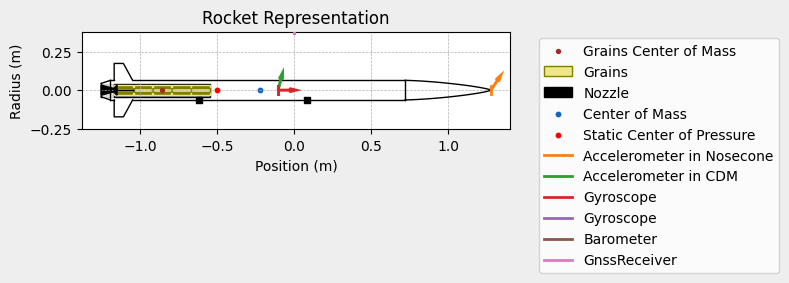

In [49]:
calisto.draw(plane="xz")

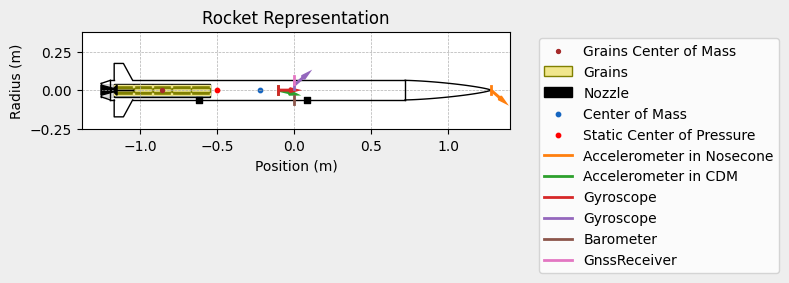

In [50]:
calisto.draw(plane="yz")

## Add Air Brakes to the Rocket

In [13]:
def controller_function(
    time, sampling_rate, state, state_history, observed_variables, air_brakes, sensors
):
    # state = [x, y, z, vx, vy, vz, e0, e1, e2, e3, wx, wy, wz]
    altitude_ASL = state[2]
    altitude_AGL = altitude_ASL - env.elevation
    vx, vy, vz = state[3], state[4], state[5]

    # Get winds in x and y directions
    wind_x, wind_y = env.wind_velocity_x(altitude_ASL), env.wind_velocity_y(
        altitude_ASL
    )

    # Calculate Mach number
    free_stream_speed = ((wind_x - vx) ** 2 + (wind_y - vy) ** 2 + (vz) ** 2) ** 0.5
    mach_number = free_stream_speed / env.speed_of_sound(altitude_ASL)

    # Get previous state from state_history
    previous_state = state_history[-1]
    previous_vz = previous_state[5]

    # If we wanted to we could get the returned values from observed_variables:
    # returned_time, deployment_level, drag_coefficient = observed_variables[-1]

    # Check if the rocket has reached burnout
    accelerometer = sensors[0]
    if accelerometer.measurement[2] > 0:
        return None

    # If below 1500 meters above ground level, air_brakes are not deployed
    if altitude_AGL < 1500:
        air_brakes.deployment_level = 0

    # Else calculate the deployment level
    else:
        # Controller logic
        new_deployment_level = (
            air_brakes.deployment_level + 0.1 * vz + 0.01 * previous_vz**2
        )

        # Limiting the speed of the air_brakes to 0.2 per second
        # Since this function is called every 1/sampling_rate seconds
        # the max change in deployment level per call is 0.2/sampling_rate
        max_change = 0.2 / sampling_rate
        lower_bound = air_brakes.deployment_level - max_change
        upper_bound = air_brakes.deployment_level + max_change
        new_deployment_level = min(max(new_deployment_level, lower_bound), upper_bound)

        air_brakes.deployment_level = new_deployment_level

    # Return variables of interest to be saved in the observed_variables list
    return (
        time,
        air_brakes.deployment_level,
        air_brakes.drag_coefficient(air_brakes.deployment_level, mach_number),
    )

In [14]:
air_brakes = calisto.add_air_brakes(
    drag_coefficient_curve="../../data/calisto/air_brakes_cd.csv",
    controller_function=controller_function,
    sampling_rate=10,
    reference_area=None,
    clamp=True,
    initial_observed_variables=[0, 0, 0],
    override_rocket_drag=False,
    name="AirBrakes",
    controller_name="AirBrakes Controller",
)

In [15]:
# air_brakes.all_info()

## Simulate Flight

In [16]:
test_flight = Flight(
    rocket=calisto,
    environment=env,
    rail_length=5.2,
    inclination=85,
    heading=0,
    time_overshoot=False,
    terminate_on_apogee=True,
)

## Visualize the results

In [17]:
# To export sensor data to a csv file:
barometer_clean.export_measured_data("exported_barometer_data.csv")

Data saved to aaaa.csv


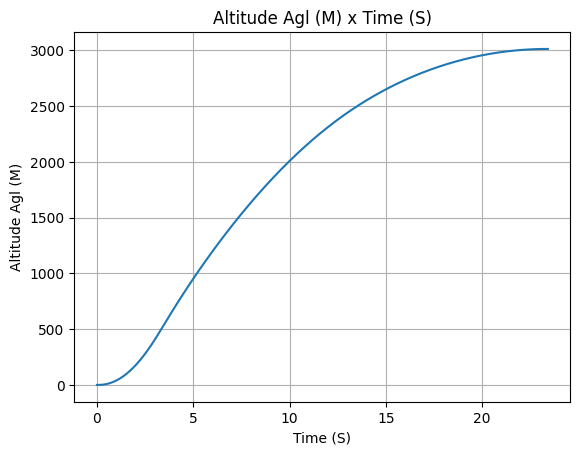

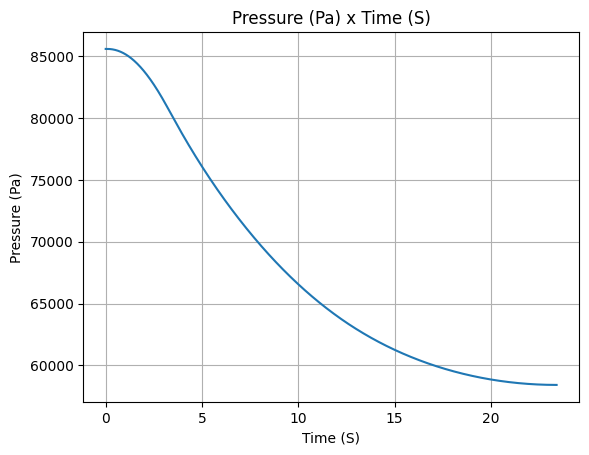

In [28]:
# To visualize the altitude.
# Notice that the air brakes makes the rocket achieve a perfect apogee
test_flight.altitude()
test_flight.pressure()

### Accelerometer

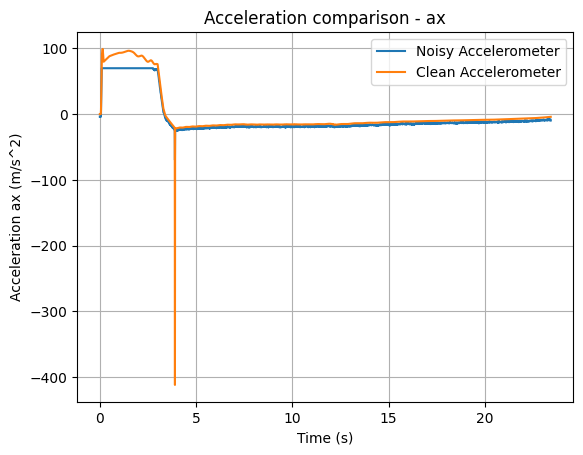

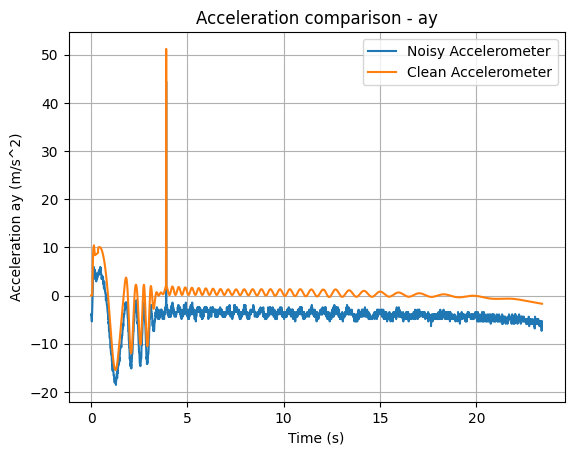

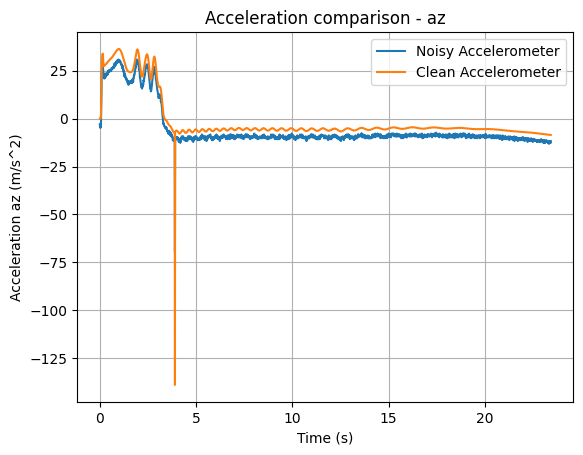

In [44]:
# get first column of every row as time from [(time,(ax,ay,az)),...] = a.measured_data
time1, ax, ay, az = zip(*accel_noisy_nosecone.measured_data)
time2, bx, by, bz = zip(*accel_clean_cdm.measured_data)


plt.plot(time1, ax, label="Noisy Accelerometer")
plt.plot(time2, bx, label="Clean Accelerometer")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ax (m/s^2)")
plt.legend()
plt.grid()
plt.title("Acceleration comparison - ax")
plt.show()

plt.plot(time1, ay, label="Noisy Accelerometer")
plt.plot(time2, by, label="Clean Accelerometer")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ay (m/s^2)")
plt.legend()
plt.grid()
plt.title("Acceleration comparison - ay")
plt.show()

plt.plot(time1, az, label="Noisy Accelerometer")
plt.plot(time2, bz, label="Clean Accelerometer")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration az (m/s^2)")
plt.legend()
plt.grid()
plt.title("Acceleration comparison - az")
plt.show()

### Total Acceleration

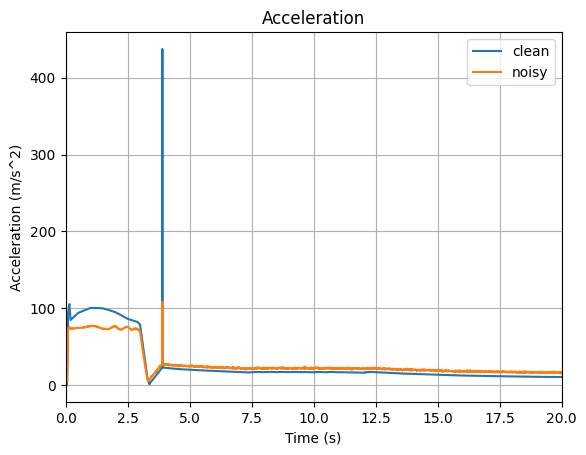

In [45]:
abs_a = (np.array(ax) ** 2 + np.array(ay) ** 2 + np.array(az) ** 2) ** 0.5
abs_b = (np.array(bx) ** 2 + np.array(by) ** 2 + np.array(bz) ** 2) ** 0.5

plt.plot(time2, abs_b, label="clean")
plt.plot(time1, abs_a, label="noisy")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.xlim(0, 20)
plt.grid()
plt.title("Acceleration")
plt.show()

### Gyroscope

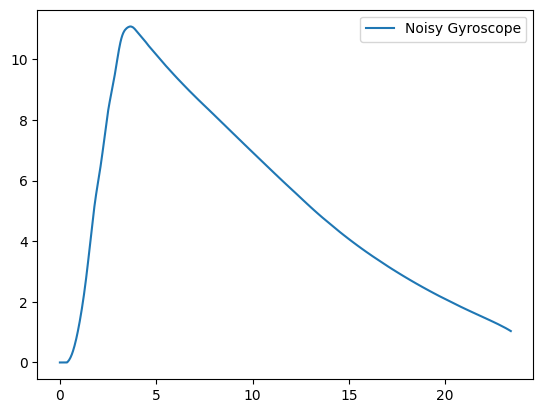

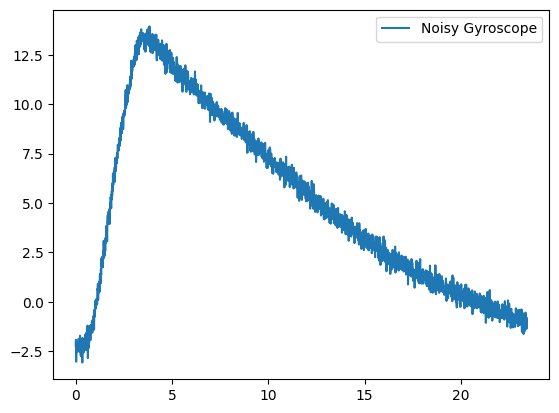

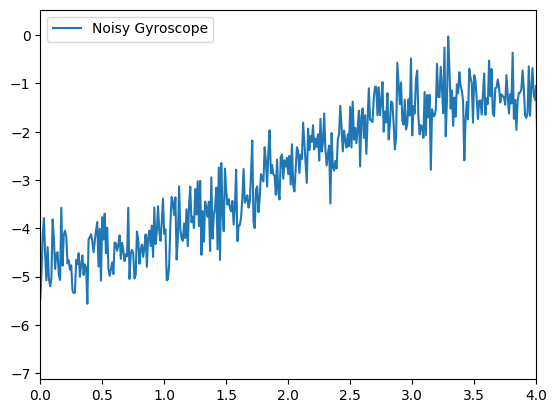

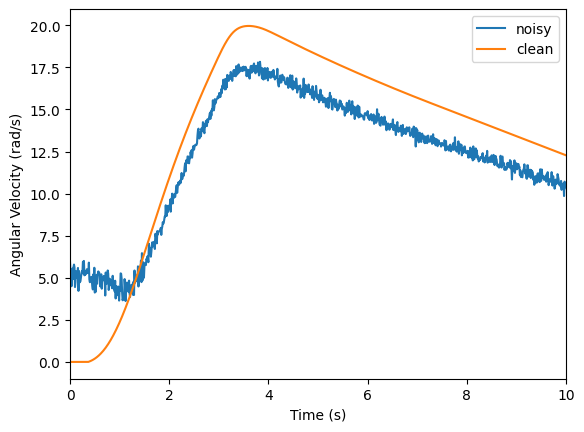

In [27]:
time1, wx, wy, wz = zip(*gyro_noisy.measured_data)
time2, zx, zy, zz = zip(*gyro_clean.measured_data)

plt.plot(time1, wx, label='Noisy Gyroscope')
# plt.plot(time2, zx, label='Clean Gyroscope')
plt.legend()
plt.show()

plt.plot(time1, wy, label='Noisy Gyroscope')
# plt.plot(time2, zy, label='Clean Gyroscope')
plt.legend()
plt.show()

plt.plot(time1, wz, label='Noisy Gyroscope')
plt.xlim(0, 4)
# plt.plot(time2, zz, label='Clean Gyroscope')
plt.legend()
plt.show()

# now plot the total angular velocity

abs_w = (np.array(wx) ** 2 + np.array(wy) ** 2 + np.array(wz) ** 2) ** 0.5
abs_z = (np.array(zx) ** 2 + np.array(zy) ** 2 + np.array(zz) ** 2) ** 0.5
plt.plot(time1, abs_w, label="noisy")
plt.plot(time2, abs_z, label="clean")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()
plt.xlim(0, 10)
plt.show()

### Barometer

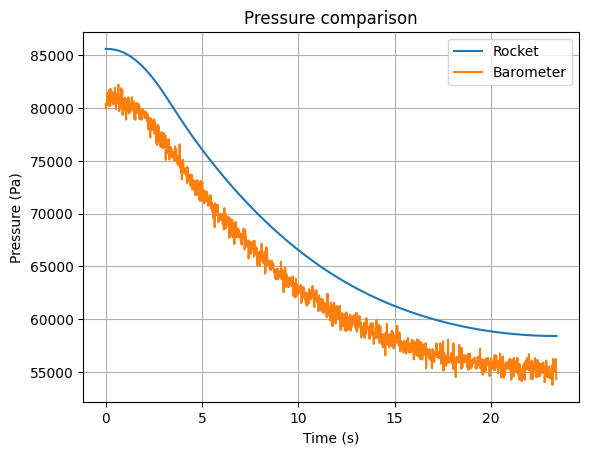

In [42]:
time_barometer, pressure_barometer = zip(*barometer_clean.measured_data)

rocket_pressure = test_flight.pressure.y_array
rocket_time = test_flight.pressure.x_array

plt.plot(rocket_time, rocket_pressure, label="Rocket")
plt.plot(time_barometer, pressure_barometer, label="Barometer")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure comparison")
plt.grid()
plt.legend()
plt.show()